In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import sys
import os
sys.path.insert(0, '../dual_task')

current_dir = os.path.dirname(os.path.abspath('__file__'))

# Get parent directory (= the project root)
project_root = os.path.join(current_dir, '..')

# Append to system path
sys.path.append(project_root)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem
from scipy.io import loadmat
# from pingouin import rm_anova, anova
import pandas as pd

import dual_data.common
from dual_data.common.plot_utils import add_vlines, save_fig
from dual_data.stats.bootstrap import my_boots_ci

sns.set_context("poster")
sns.set_style("ticks")
plt.rc("axes.spines", top=False, right=False)
fig_path = '/home/leon/bebopalula/python/dual/figs/perf'


In [3]:
golden_ratio = (5**.5 - 1) / 2
width = 6
import matplotlib
matplotlib.rcParams['figure.figsize'] = [width, width * golden_ratio ]
# matplotlib.rcParams['lines.markersize'] = 3
# sns.set(rc={'figure.figsize':(width, width * golden_ratio)})
%matplotlib inline


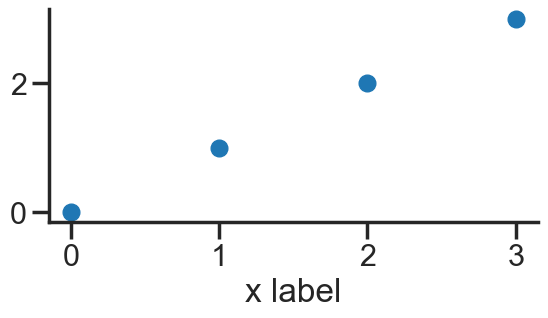

In [4]:
plt.figure()
plt.xlabel('x label') ;
plt.plot([0,1,2,3], [0,1,2,3], 'o')
plt.show()


In [42]:
from dual_data.licks.licks import *


In [82]:
i_mouse = 2
i_session = 10
# path = '../data/behavior/DualTask_DPA_vs_Single_DPA/Dual_mouse_%d' % i_mouse
path = '../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_%d' % i_mouse # 
data = loadmat(path + '/session_%d' % i_session)
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'AbolishTrials', 'CongTrials', 'Data', 'Data1', 'DataD', 'DataD1', 'DataD2', 'DataID', 'DataID1', 'DataID2', 'DataID3', 'DataP', 'Data_Cong', 'Data_Incong', 'Delay', 'Delay1', 'FDelay', 'FirstOdor', 'FirstOdor1', 'ITI', 'IncongTrials', 'LDelay', 'LaserPeriod', 'MeantrialLen', 'Odor', 'Odor1', 'ResponseDelay', 'Results_Cong', 'Results_Incong', 'Sample', 'Sample1', 'SampleD', 'SampleD1', 'SampleD2', 'SampleP', 'SecondOdor', 'SecondOdor1', 'SerialData', 'Test', 'Test1', 'TrialNum', 'TrialNumD', 'TrialNumP', 'TrialNum_Cong', 'TrialNum_Incong', 'Trials', 'Trials1', 'TrialsD', 'TrialsD1', 'TrialsD2', 'TrialsP', 'Water', 'Water1', 'laserTime', 'lickTime'])

In [83]:
data['SerialData']


array([[1044267570,         85,         51,         95,        170],
       [1044267574,         85,        200,          2,        170],
       [1044267578,         85,         61,          1,        170],
       ...,
       [1048606573,         85,          0,          1,        170],
       [1048614683,         85,          0,          1,        170],
       [1048614687,         85,          8,         91,        170]],
      dtype=int32)

licks (3226,) trials 143 lick rate 0.08951048951048951


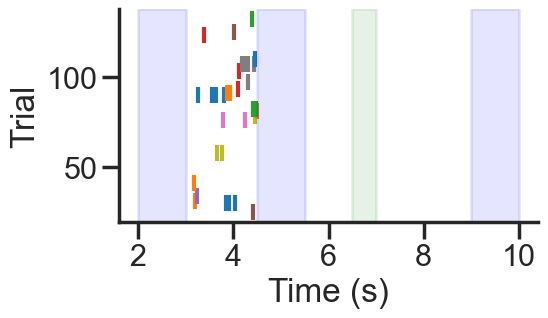

In [88]:
trials = get_licks_ED(licks, t_sample, t_dist, t_test, diff=1.5, inter=3)
lick_rate = get_lick_rate(trials)
print("licks", licks.shape, "trials", len(trials), "lick rate", lick_rate)
plot_licks(trials)


In [116]:
licks, t_sample, t_dist, t_test = get_licks_and_times(data, mouse='DPA')

print(t_sample.shape, t_test.shape)
print((t_sample[0] - t_test[0]) / 1000)

(207,) (192,)
-11.005


In [91]:
1044269073-1044272075


-3002

In [70]:
from dual_data.licks.licks import *

In [71]:
from dual_data.licks.licks import get_lick_rate_mice


In [90]:
thresh = [3, 4.5]

path = '../data/behavior/DualTask-Silencing-ACC-Prl/'
n_session = 10
rate_ctrl_ACC_Prl, rate_opto_ACC_Prl = get_lick_rate_mice(path, n_session, thresh)

print(rate_ctrl_ACC_Prl.shape)

path = '../data/behavior/DualTask-Silencing-ACC/'
n_session = 10
rate_ctrl_ACC, rate_opto_ACC = get_lick_rate_mice(path, n_session, thresh)

# path = '../data/behavior/DualTask-Silencing-Prl-ACC/'
# n_session = 10
# rate_ctrl_Prl_ACC, rate_opto_Prl_ACC = get_lick_rate_mice(path, n_session, thresh)

# path = '../data/behavior/DualTask_DPA_vs_Single_DPA/'
# n_session = 10
# rate_ctrl_DPA, rate_opto_DPA = get_lick_rate_mice(path, n_session, thresh)



../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_4


../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_5


../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_6


../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_7


../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_8


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_0


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_1


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_2


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_3


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_4


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_5


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_6


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_7


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_8


(9, 11)


../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_0


../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_1


../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_2


../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_3


../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_4


../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_5


../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_6


../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_7


../data/behavior/DualTask-Silencing-ACC-Prl/control_mouse_8


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_0


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_1


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_2


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_3


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_4


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_5


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_6


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_7


../data/behavior/DualTask-Silencing-ACC-Prl/opto_mouse_8


(9, 11)
../data/behavior/DualTask-Silencing-ACC/control_mouse_0


../data/behavior/DualTask-Silencing-ACC/control_mouse_1


../data/behavior/DualTask-Silencing-ACC/control_mouse_10


../data/behavior/DualTask-Silencing-ACC/control_mouse_2


../data/behavior/DualTask-Silencing-ACC/control_mouse_3


../data/behavior/DualTask-Silencing-ACC/control_mouse_4


../data/behavior/DualTask-Silencing-ACC/control_mouse_5


../data/behavior/DualTask-Silencing-ACC/control_mouse_6


../data/behavior/DualTask-Silencing-ACC/control_mouse_7


../data/behavior/DualTask-Silencing-ACC/control_mouse_8


../data/behavior/DualTask-Silencing-ACC/control_mouse_9


../data/behavior/DualTask-Silencing-ACC/opto_mouse_0


../data/behavior/DualTask-Silencing-ACC/opto_mouse_1


../data/behavior/DualTask-Silencing-ACC/opto_mouse_2


../data/behavior/DualTask-Silencing-ACC/opto_mouse_3


../data/behavior/DualTask-Silencing-ACC/opto_mouse_4


../data/behavior/DualTask-Silencing-ACC/opto_mouse_5


../data/behavior/DualTask-Silencing-ACC/opto_mouse_6


../data/behavior/DualTask-Silencing-ACC/opto_mouse_7


../data/behavior/DualTask-Silencing-ACC/opto_mouse_8


../data/behavior/DualTask-Silencing-ACC/opto_mouse_9


In [76]:
rate_control = rate_ctrl_ACC_Prl
rate_opto = rate_opto_ACC_Prl

# rate_control = rate_ctrl_ACC
# rate_opto = rate_opto_ACC

# rate_control = rate_ctrl_Prl_ACC
# rate_opto = rate_opto_Prl_ACC

rate_control = np.vstack((rate_ctrl_ACC_Prl, rate_ctrl_ACC))
rate_opto = np.vstack((rate_opto_ACC_Prl,rate_opto_ACC))

# rate_control = np.vstack((rate_ctrl_ACC_Prl, rate_ctrl_DPA))

# rate_control = np.vstack((rate_ctrl_ACC_Prl, rate_ctrl_ACC, rate_ctrl_DPA))
# rate_opto = np.vstack((rate_opto_ACC_Prl, rate_opto_ACC))

# rate_control = np.vstack((rate_ctrl_ACC_Prl[:,:-1], rate_ctrl_ACC[:,:-1], rate_ctrl_Prl_ACC))
# rate_opto = np.vstack((rate_opto_ACC_Prl[:,:-1],rate_opto_ACC[:,:-1], rate_opto_Prl_ACC)) 

# print(rate_ctrl_ACC_Prl.shape,rate_ctrl_ACC.shape, rate_control.shape)
# print(rate_opto_ACC_Prl.shape,rate_opto_ACC.shape, rate_opto.shape)


In [77]:
_, control_ci = my_boots_ci(rate_control, lambda x: np.nanmean(x, axis=0), n_samples=1000)
_, opto_ci = my_boots_ci(rate_opto, lambda x: np.nanmean(x, axis=0), n_samples=1000)


bootstrap:   0%|                                                                                                            | 0/1000 [00:00<?, ?it/s]

bootstrap:   0%|▍                                                                                                   | 4/1000 [00:00<00:28, 35.29it/s]

bootstrap:   4%|███▉                                                                                              | 40/1000 [00:00<00:04, 215.13it/s]

bootstrap:  12%|███████████▎                                                                                     | 116/1000 [00:00<00:01, 454.56it/s]

bootstrap:  18%|█████████████████▊                                                                               | 183/1000 [00:00<00:01, 537.47it/s]

bootstrap:  25%|███████████████████████▉                                                                         | 247/1000 [00:00<00:01, 572.78it/s]

bootstrap:  35%|██████████████████████████████████▏                                                              | 352/1000 [00:00<00:00, 729.70it/s]

bootstrap:  49%|███████████████████████████████████████████████▌                                                 | 490/1000 [00:00<00:00, 939.01it/s]

bootstrap:  61%|██████████████████████████████████████████████████████████▊                                     | 612/1000 [00:00<00:00, 1021.91it/s]

bootstrap:  76%|█████████████████████████████████████████████████████████████████████████▏                      | 763/1000 [00:00<00:00, 1172.09it/s]

bootstrap: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 991.61it/s]

bootstrap:   0%|                                                                                                            | 0/1000 [00:00<?, ?it/s]

bootstrap:   1%|▌                                                                                                   | 6/1000 [00:00<00:17, 57.83it/s]

bootstrap:   1%|█▏                                                                                                 | 12/1000 [00:00<00:22, 44.69it/s]

bootstrap:   8%|███████▎                                                                                          | 75/1000 [00:00<00:03, 269.34it/s]

bootstrap:  13%|████████████▉                                                                                    | 134/1000 [00:00<00:02, 381.35it/s]

bootstrap:  20%|███████████████████▎                                                                             | 199/1000 [00:00<00:01, 468.94it/s]

bootstrap:  27%|██████████████████████████                                                                       | 269/1000 [00:00<00:01, 541.47it/s]

bootstrap:  39%|██████████████████████████████████████                                                           | 392/1000 [00:00<00:00, 755.91it/s]

bootstrap:  52%|██████████████████████████████████████████████████▏                                              | 518/1000 [00:00<00:00, 910.35it/s]

bootstrap:  64%|█████████████████████████████████████████████████████████████▋                                  | 642/1000 [00:00<00:00, 1010.65it/s]

bootstrap:  85%|█████████████████████████████████████████████████████████████████████████████████▏              | 846/1000 [00:01<00:00, 1322.90it/s]

bootstrap: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 898.12it/s]

In [78]:
print(control_ci.shape, opto_ci.shape)


(11, 2) (11, 2)


(11,) (11,)


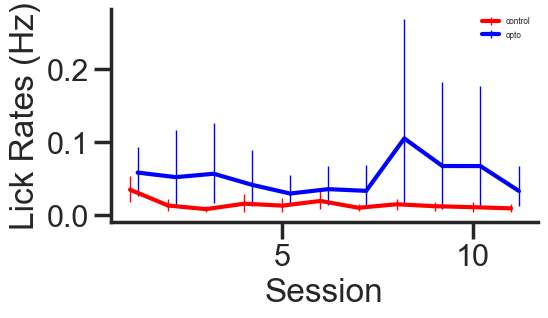

In [79]:
mean_control = np.nanmean(rate_control, 0)
mean_opto = np.nanmean(rate_opto, 0)
print(mean_control.shape, mean_opto.shape)
sessions = np.arange(1, mean_control.shape[0]+1, 1)

plt.errorbar(sessions, mean_control, yerr=control_ci.T, color='r', fmt='-o', ms=1, elinewidth=1, label='control')
plt.errorbar(sessions + .2, mean_opto, yerr=opto_ci.T, color='b', fmt='-o', ms=1, elinewidth=1, label='opto')

plt.xlabel('Session')
plt.ylabel('Lick Rates (Hz)')
plt.legend(loc='best', frameon=False, fontsize=6)
# plt.xlim([0.75, 6.25])
# plt.ylim([0, .15])


In [76]:
df = pd.DataFrame(rate_control[0], columns=['rate'])
df['session'] = sessions
df['animal'] = 1
df['opto'] = 0

for i in range(1, rate_control.shape[0]):
    df_control = pd.DataFrame(rate_control[i], columns=['rate'])
    df_control['session'] = sessions
    df_control['animal'] = i
    df_control['opto'] = 0
    
    df = pd.concat([df, df_control], ignore_index=True)

for i in range(rate_opto.shape[0]):
    df_opto = pd.DataFrame(rate_opto[i], columns=['rate'])
    df_opto['session'] = sessions
    df_opto['animal'] = i
    df_opto['opto'] = 1
    
    df = pd.concat([df, df_opto], ignore_index=True)

# aov = rm_anova(dv='rate', within=['session', 'opto'], subject='animal', data=df, detailed=True)
# aov = anova(dv='licks', between=['session', 'animal', 'opto'], data=df)

# print(aov)


# performance


In [35]:
perf = []

for i_mouse in range(8):
    
    perf_mouse = []
    
    for i_session in range(16):

        path = '../data/behavior/DualTask_DPA_vs_Single_DPA/'
        path += 'DPA_mouse_%d' % i_mouse
        path += '/session_%d.mat' % i_session
        data = loadmat(path)
    
        perf_single = np.mean(data['Data'].T[-1])

        path = '../data/behavior/DualTask_DPA_vs_Single_DPA/'
        path += 'Dual_mouse_%d' % i_mouse
        path += '/session_%d.mat' % i_session
        data = loadmat(path)
        
        perf_ODR = np.mean(data['Data1'].T[-1])
        perf_Go = np.mean(data['DataD1'].T[-1])
        perf_NoGo = np.mean(data['DataD2'].T[-1])
        
        perf_mouse.append(np.hstack((perf_single, perf_ODR, perf_Go, perf_NoGo)))
    
    perf.append(np.array(perf_mouse))
    
perf = np.array(perf)


In [36]:
mean_perf = np.mean(perf, axis=0).T
sem_perf = sem(perf, axis=0).T
print(perf.shape, sem_perf.shape)

(8, 16, 4) (4, 16)


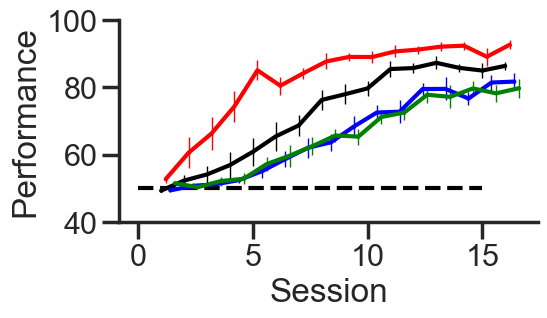

In [61]:
sessions = np.arange(1, 17, 1)

plt.errorbar(sessions, mean_perf[0], yerr=sem_perf[0], color='k', fmt='-o', ms=1, elinewidth=1)

plt.errorbar(sessions+.2, mean_perf[1], yerr=sem_perf[1], color='r', fmt='-o', ms=1, elinewidth=1)
plt.errorbar(sessions+.4, mean_perf[2], yerr=sem_perf[2], color='b', fmt='-o', ms=1, elinewidth=1)
plt.errorbar(sessions+.6, mean_perf[3], yerr=sem_perf[3], color='g', fmt='-o', ms=1, elinewidth=1)

plt.xlabel("Session")
plt.ylabel("Performance")
plt.ylim([40, 100])
plt.hlines(50, 0, 15, 'k', ls='--')
plt.show()

In [43]:
def get_perf_mice(path, n_session):
    df_mice = pd.DataFrame(columns=['hit', 'miss', 'fa', 'cr', 'perf', 'animal', 'session', 'task', 'opto'])    
    mice = np.sort(os.listdir(path))
    
    for mouse in mice:
    
        sessions = np.sort(os.listdir(path+mouse))
        # print(path+mouse)        
        
        for session in range(n_session+1):
            
            try:
                raw = loadmat(path + mouse + '/session_%d' % session)
            except:
                pass

            if 'opto' in mouse:
                session = session + .2

            if 0==1:
                # if 'DPA'in mouse:
                pass
            else:
                # for task in ["Single_DPA", "DPA", "DualGo", "DualNoGo", "ODR"]:
                # for task in ["ODR"]:
                for task in ["DPA", "DualGo", "DualNoGo"]:

                    try:
                        if task == "Single_DPA":
                            if 'DPA'in mouse:
                                data = np.mean(raw['Data'], 0)[1:]
                            else:
                                data = np.mean(raw['DataP'], 0)[1:]
                        elif task == "DPA":
                            if 'DPA'in mouse:
                                pass
                            else:
                                data = np.mean(raw['Data'], 0)[1:]
                        
                        elif task == "DualGo":
                            data = np.mean(raw['DataD1'], 0)[1:]
                        elif task == "DualNoGo":
                            data = np.mean(raw['DataD2'], 0)[1:]
                        elif task=='ODR':
                            data = np.mean(raw['Data1'], 0)[1:]
                        
                        data[-1] /= 100
                        data[:-1] /= np.sum(data[:-1])
                        data[:-1] *= 2
                    
                        data = data[np.newaxis]
                        df = pd.DataFrame(data, columns=['hit', 'miss', 'fa', 'cr', 'perf'])
                
                        df['animal'] = mouse[-1]
                        df['session'] = session 
                                            
                        if task=='DPA':
                            df['session'] = session 
                        if task=='DualGo':
                            df['session'] = session 
                        if task=='DualNoGo':
                            df['session'] = session
                            
                        # if task=='DPA':
                        #     df['session'] = session 
                        # if task=='DualGo':
                        #     df['session'] = session + .2
                        # if task=='DualNoGo':
                        #     df['session'] = session - .2
                            
                        df['task'] = task
                    
                        if 'opto' in mouse:
                            if path == '/home/leon/data/behavior/DualTask-Silencing-ACC/':
                                df['opto'] = 'opto_ACC'
                            else:
                                df['opto'] = 'opto'
                        else:
                            df['opto'] = 'control'
                        
                        df_mice = pd.concat([df_mice, df], ignore_index=True)

                    except:
                        pass
                    
    return df_mice


In [47]:
n_session = 16

path = '../data/behavior/DualTask-Silencing-ACC-Prl/'
df_ACC_Prl = get_perf_mice(path, n_session)

path = '../data/behavior/DualTask-Silencing-ACC/'
df_ACC = get_perf_mice(path, n_session)

path = '../data/behavior/DualTask_DPA_vs_Single_DPA/'
df_DPA = get_perf_mice(path, n_session)

df_all = df_DPA
df_all = pd.concat((df_ACC_Prl, df_ACC, df_DPA))

# print(df_all.head())

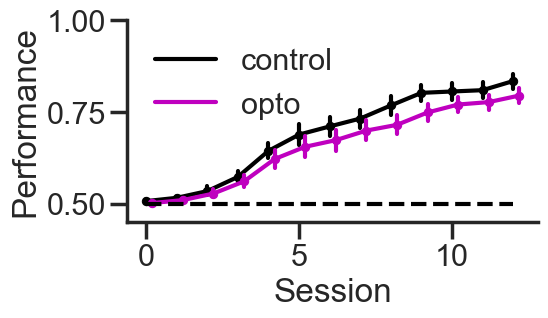

In [60]:
df_opto = df_ACC_Prl
df_opto = pd.concat((df_ACC_Prl, df_ACC))
df_opto = df_opto[df_opto['session']<12.5]
df_opto = df_opto[df_opto['opto'] != 'opto_ACC']

palette = ['k', 'm']

figname = 'performance_ctrl_opto'
fig, ax = plt.subplots() 
sns.lineplot(data=df_opto, x='session', y='perf', hue='opto', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=6)
plt.ylabel('Performance')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
plt.legend(loc='best', frameon=False)
plt.hlines(.5, 0, 12, 'k', ls='--')
plt.ylim([0.45, 1])

plt.yticks([0.5, 0.75,  1])
save_fig(fig, figname, fig_path)

plt.show()


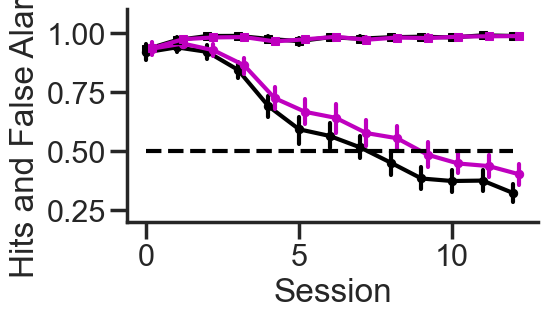

In [86]:
palette = ['k', 'm']

figname = 'fa_ctrl_opto'
fig, ax = plt.subplots()

sns.lineplot(data=df_opto, x='session', y='fa', hue='opto', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=6)
sns.lineplot(data=df_opto, x='session', y='hit', hue='opto', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=6)
plt.ylabel('Hits and False Alarms')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
# plt.legend(loc='best', frameon=False, fontsize=8)
plt.hlines(.5, 0, 12, 'k', ls='--')
plt.ylim([0.2, 1.1])

plt.yticks([0.25, 0.5, 0.75,  1])
save_fig(fig, figname, fig_path)

plt.show()


In [85]:
df_all = pd.concat((df_ACC_Prl, df_ACC, df_DPA))

df_ctrl = df_all[df_all.opto=='control']
df_ctrl = df_ctrl.drop(columns=['opto'])
df_ctrl = df_ctrl[df_ctrl['session']<10.5]

df_DPA = pd.concat((df_ctrl[df_ctrl['task']=='DPA'], df_ctrl[df_ctrl['task']=='Single_DPA']))
df_ODR = df_ctrl[df_ctrl['task']=='ODR']

df_ctrl = df_ctrl[df_ctrl.task!='Single_DPA']
df_ctrl = df_ctrl[df_ctrl.task!='ODR']


# print(df_ctrl)
print(df_ODR.head())

Empty DataFrame
Columns: [hit, miss, fa, cr, perf, animal, session, task]
Index: []


/tmp/ipykernel_3457189/724908211.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_ODR, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


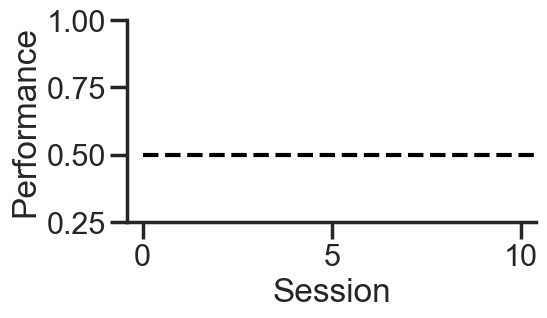

In [67]:
palette = ['m']

figname = 'performance_ODR'
fig, ax = plt.subplots() 
sns.lineplot(data=df_ODR, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
plt.ylabel('Performance')
plt.xlabel('Session')
plt.xlim([-.4, 10.4])
plt.legend(loc='best', frameon=False)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0.45, 1])

plt.yticks([0.25, 0.5,  0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


/tmp/ipykernel_3457189/1033887251.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_ODR, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
/tmp/ipykernel_3457189/1033887251.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_ODR, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=3)


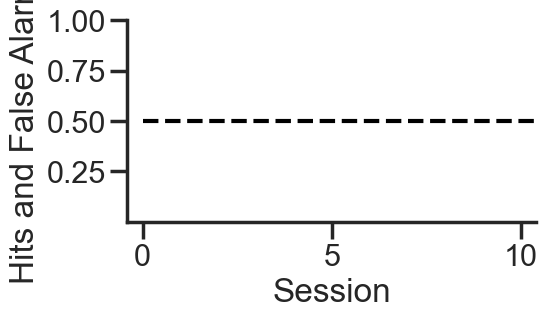

In [65]:
palette = ['m']

figname = 'hits_fa_ODR'
fig, ax = plt.subplots() 
sns.lineplot(data=df_ODR, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
sns.lineplot(data=df_ODR, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=3)
plt.ylabel('Hits and False Alarms')
plt.xlabel('Session')
plt.xlim([-.4, 10.4])
# plt.legend(loc='best', frameon=False, fontsize=6)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0., 1])

plt.yticks([0.25, 0.5,  0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


/tmp/ipykernel_3457189/179346528.py:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=df_DPA, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)


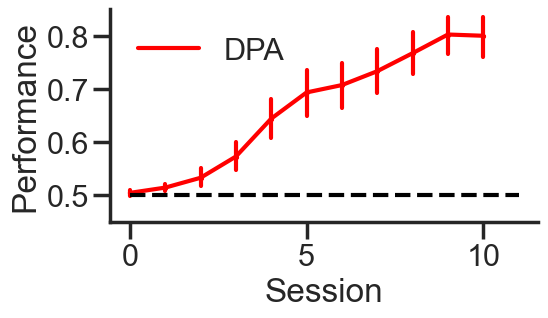

In [68]:
palette = ['r', 'b']

figname = 'performance_DPA'
fig, ax = plt.subplots() 
sns.lineplot(data=df_DPA, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
plt.ylabel('Performance')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
plt.legend(loc='best', frameon=False)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0.45, .85])

plt.yticks([0.5, 0.6,  0.7, 0.8])
save_fig(fig, figname, fig_path)

plt.show()


/tmp/ipykernel_3457189/1897095523.py:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=df_DPA, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)


/tmp/ipykernel_3457189/1897095523.py:6: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=df_DPA, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=3)


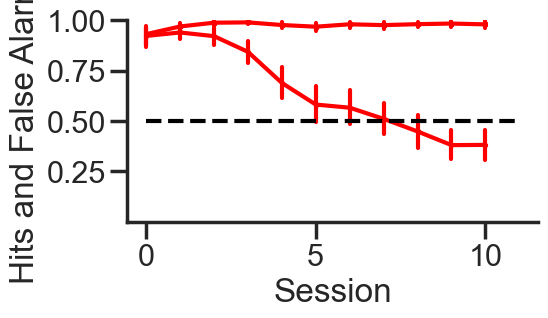

In [69]:
palette = ['r', 'b']

figname = 'hits_fa_DPA'
fig, ax = plt.subplots() 
sns.lineplot(data=df_DPA, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
sns.lineplot(data=df_DPA, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=3)
plt.ylabel('Hits and False Alarms')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
# plt.legend(loc='best', frameon=False, fontsize=6)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0., 1])

plt.yticks([0.25, 0.5,  0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


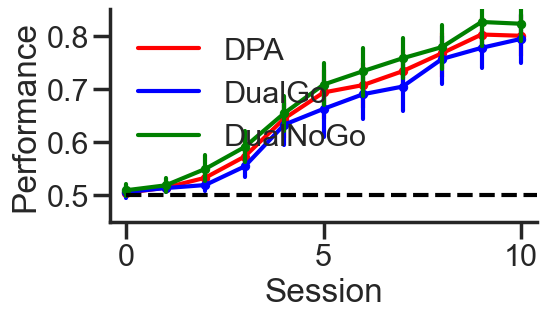

In [84]:
palette = ['r', 'b', 'g']

figname = 'performance'
fig, ax = plt.subplots() 
sns.lineplot(data=df_ctrl, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=6)
plt.ylabel('Performance')
plt.xlabel('Session')
plt.xlim([-.4, 10.4])
plt.legend(loc='upper left', frameon=False)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0.45, .85])

plt.yticks([0.5, 0.6,  0.7, 0.8])
save_fig(fig, figname, fig_path)

plt.show()


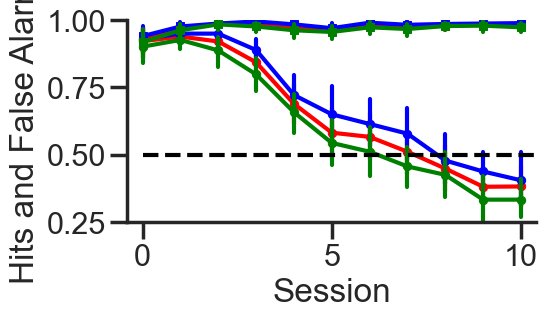

In [83]:
palette = ['r', 'b', 'g']
figname = 'false_alarms'

fig, ax = plt.subplots()
sns.lineplot(data=df_ctrl, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ms=6, ax=ax)
sns.lineplot(data=df_ctrl, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ms=6, ax=ax)
plt.ylabel('Hits and False Alarms')
plt.xlabel('Session')
plt.xlim([-.4, 10.4])
# plt.legend(loc='best', frameon=False, fontsize=6)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0.25, 1])
plt.yticks([0.25, 0.5, 0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


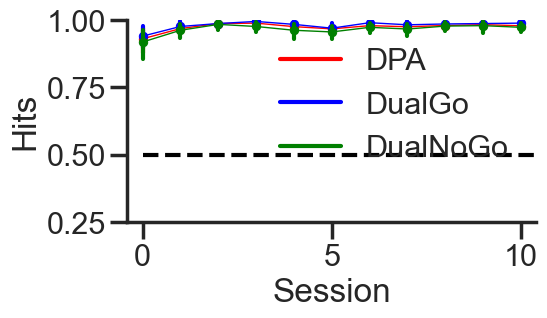

In [82]:
palette = ['r', 'b', 'g']
figname = 'hits'

sns.lineplot(data=df_ctrl, x='session', y='hit', hue='task', legend=True, errorbar='ci', err_style='bars', palette=palette, lw=1, marker='o', markeredgecolor=None, ms=6)
plt.ylabel('Hits')
plt.xlabel('Session')
plt.legend(loc='best', frameon=False)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.xlim([-.4, 10.4])
plt.ylim([0.25, 1])
plt.yticks([0.25, 0.5, 0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


In [73]:
df_avg = df_ctrl.groupby(['task', 'session'], as_index=False).agg(np.mean)
df_avg.reset_index(inplace=True)
print(df_avg.head())


   index task session       hit      miss        fa        cr      perf  \
0      0  DPA       0  0.930729  0.069271  0.921875  0.078125  0.504625   
1      1  DPA       1  0.968750  0.031250  0.939063  0.060937  0.514500   
2      2  DPA       2  0.987500  0.012500  0.920833  0.079167  0.533000   
3      3  DPA       3  0.989062  0.010937  0.843229  0.156771  0.572937   
4      4  DPA       4  0.976042  0.023958  0.689063  0.310937  0.644250   

                animal  
0  61728390051172840.0  
1  61728390051172840.0  
2  61728390051172840.0  
3  61728390051172840.0  
4  61728390051172840.0  


In [74]:
def get_df_avg_task(df, task):
    df_DPA = df[df['task']==task]
    df_DPA = df_DPA.drop(columns=['task'])
    # print(df_DPA)

    df_DPA_avg = df_DPA.groupby(['session'], as_index=False).agg(['mean', 'sem'])
    df_DPA_avg.reset_index(inplace=True)

    return df_DPA_avg


In [75]:
def plot_perf_df(df, perf_type, ax=None):

    if ax is None:
        fig, ax = plt.subplots()

    marker = 'o'
    if perf_type=='fa':
        plt.ylabel('False Alarms')
    if perf_type=='hit':
        plt.ylabel('Hits')
        marker = 'd'
    if perf_type == 'perf':
        plt.ylabel('Performance')
        
    df_DPA_avg = get_df_avg_task(df, 'DPA')
    df_DPA_avg.plot(x='session', y=perf_type, yerr='sem', color='r', ax=ax, elinewidth=.75, lw=1, marker=marker, ms=2.5)

    df_DualGo_avg = get_df_avg_task(df, 'DualGo')
    df_DualGo_avg.plot(x='session', y=perf_type, yerr='sem', color='b', ax=ax, elinewidth=.75, lw=1, marker=marker, ms=2.5)

    df_DualNoGo_avg = get_df_avg_task(df, 'DualNoGo')
    df_DualNoGo_avg.plot(x='session', y=perf_type, yerr='sem', color='g', ax=ax, elinewidth=.75, lw=1, marker=marker, ms=2.5)
    ax.get_legend().remove()
    plt.xlabel('Session')
    
    plt.xlim([0,11])
    plt.hlines(.5, 0, 11, 'k', ls='--')


In [76]:
def get_perf_ctrl_opto(path, n_session, perf_type):
    perf_control = []
    perf_opto = []
    
    mice = np.sort(os.listdir(path))

    for mouse in mice:
    
        perf_mouse = []    

        for i_session in range(1, n_session+1):
            i_path = path   
            i_path += mouse
            i_path +='/session_%d' % i_session
            data = loadmat(i_path)
            
            perf_DPA = get_perf(data['Data'].T, perf_type)
            perf_Go = get_perf(data['DataD1'].T, perf_type)
            perf_NoGo = get_perf(data['DataD2'].T, perf_type)
            
            perf_mouse.append(np.hstack((perf_DPA, perf_Go, perf_NoGo)))
    
        if 'control' in mouse:
            # print(path)
            perf_control.append(np.array(perf_mouse))
        else:
            # print(path)
            perf_opto.append(np.array(perf_mouse))
    
    perf_control = np.array(perf_control)
    perf_opto = np.array(perf_opto)

    return perf_control, perf_opto


In [77]:
def plot_perf_trials(perf):
    
    plt.plot(perf[0], 'r', label='DPA')
    plt.plot(perf[1], 'b', label='DualGo')
    plt.plot(perf[2], 'g', label='DualNoGo')    

    plt.legend(loc='best', frameon=False, fontsize=6)


    plt.xlabel("Session")
    plt.ylabel("Performance")
    plt.hlines(.5, 0, perf[0].shape[0], 'k', ls='--')

    plt.show()
    

In [78]:
print(perf_ctrl_ACC_Prl.shape)
print(perf_ctrl_ACC.shape)

print(perf_opto_ACC_Prl.shape)
print(perf_opto_ACC.shape)


NameError: name 'perf_ctrl_ACC_Prl' is not defined

In [79]:
perf_control = []
perf_opto = []
perf_type = 'fa'

n_session = 11
path = '/home/leon/data/behavior/DualTask-Silencing-ACC-Prl/'
# n_session = 12

perf_ctrl_ACC_Prl, perf_opto_ACC_Prl = get_perf_ctrl_opto(path, n_session, perf_type)

path = '/home/leon/data/behavior/DualTask-Silencing-ACC/'
# n_session = 16

perf_ctrl_ACC, perf_opto_ACC = get_perf_ctrl_opto(path, n_session, perf_type)

# path = '/home/leon/data/behavior/DualTask-Silencing-Prl-ACC/'
# n_session = 11

perf_ctrl_Prl, perf_opto_Prl = get_perf_ctrl_opto(path, n_session, perf_type)



FileNotFoundError: [Errno 2] No such file or directory: '/home/leon/data/behavior/DualTask-Silencing-ACC-Prl/'

In [80]:
# perf_control = perf_ctrl_ACC_Prl
# perf_opto = perf_opto_ACC_Prl

# perf_control = perf_ctrl_ACC
# perf_opto = perf_opto_ACC

# perf_control = perf_ctrl_Prl
# perf_opto = perf_opto_Prl

perf_control = np.vstack((perf_ctrl_ACC_Prl, perf_ctrl_ACC))
perf_opto = np.vstack((perf_opto_ACC_Prl, perf_opto_ACC))

# perf_control = np.vstack((perf_ctrl_ACC_Prl, perf_ctrl_Prl))
# perf_opto = np.vstack((perf_opto_ACC_Prl, perf_opto_Prl))

# perf_control = np.vstack((perf_ctrl_ACC, perf_ctrl_Prl))
# perf_opto = np.vstack((perf_opto_ACC, perf_opto_Prl))

# perf_control = np.vstack((perf_ctrl_ACC_Prl, perf_ctrl_ACC, perf_ctrl_Prl))
# perf_opto = np.vstack((perf_opto_ACC_Prl, perf_opto_ACC, perf_opto_Prl))

print(perf_control.shape, perf_opto.shape)

NameError: name 'perf_ctrl_ACC_Prl' is not defined

In [81]:
def plot_error_perf(perf, perf_type):

    mean = np.mean(perf, axis=0).T

    sem_ = sem(perf, axis=0).T
    
    pal = ['r', 'b', 'g']
    labels = ['DPA', 'DualGo', 'DualNoGo']
    dx = [0, .2, .4]

    sessions = np.arange(1, mean[0].shape[0]+1, 1)
    
    for i in range(mean.shape[0]):
        plt.errorbar(sessions + dx[i], mean[i], yerr=sem_[i], color=pal[i], fmt='-o', ms=1, elinewidth=1, label=labels[i])

    if perf_type=='fa':
        plt.ylabel('False Alarms')
    if perf_type=='hit':
        plt.ylabel('Hits')
    if perf_type == 'correct':
        plt.ylabel('Performance')
        
    plt.xlabel('Session')
    plt.hlines(.5, 1, mean[0].shape[0], 'k', ls='--')
    plt.legend(loc='best', frameon=False, fontsize=6)
    # plt.title('n=%d' % perf.shape[0])    
    

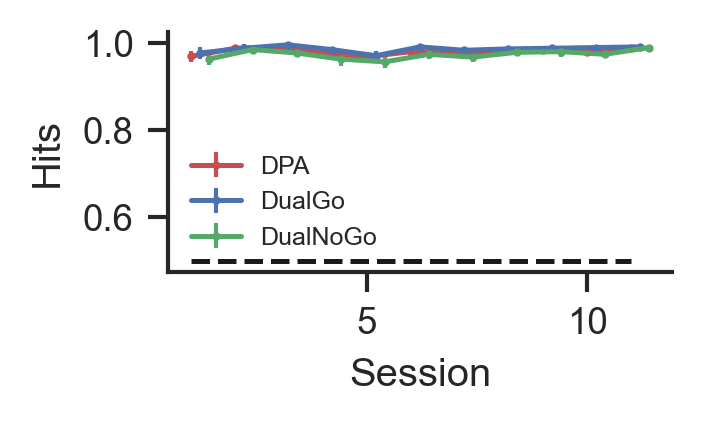

In [543]:
plot_error_perf(perf_hit, 'hit')


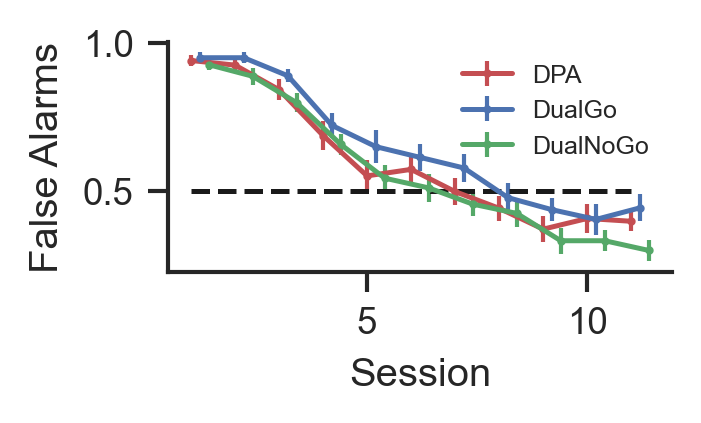

In [550]:
plot_error_perf(perf_control, 'fa')


In [484]:
# keeping trials
mean_perf_control = np.mean(perf_control, axis=0).T
mean_perf_opto = np.mean(perf_opto, axis=0).T

sem_perf_control = sem(perf_control, axis=0).T
sem_perf_opto = sem(perf_opto, axis=0).T

# over all trials 
mean_control = np.mean(np.hstack(perf_control), -1)
mean_opto = np.mean(np.hstack(perf_opto), -1)

sem_control = sem(np.hstack(perf_control), -1)
sem_opto = sem(np.hstack(perf_opto), -1)


Text(0.5, 1.0, 'All trials')

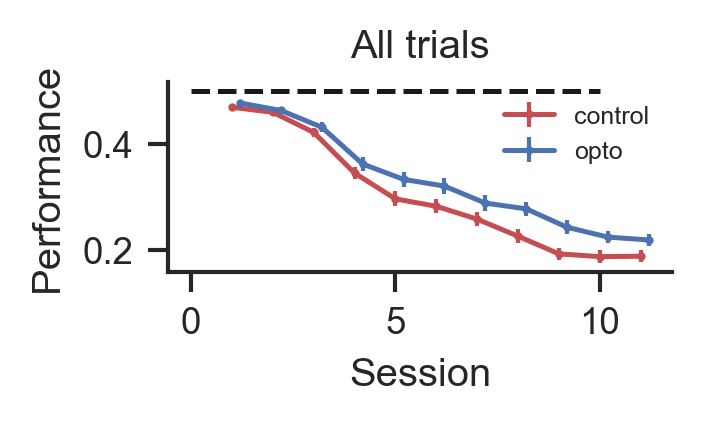

In [485]:
sessions = np.arange(1, n_session+1, 1)

plt.errorbar(sessions, mean_control, yerr=sem_control, color='r', fmt='-o', ms=1, elinewidth=1, label='control')
plt.errorbar(sessions+.2, mean_opto, yerr=sem_opto, color='b', fmt='-o', ms=1, elinewidth=1, label='opto')

plt.xlabel("Session")
plt.ylabel("Performance")
# plt.ylim([.40, 1])
plt.hlines(.5, 0, mean_control.shape[0]-1, 'k', ls='--')
plt.legend(loc='best', frameon=False, fontsize=6)
plt.title("All trials")

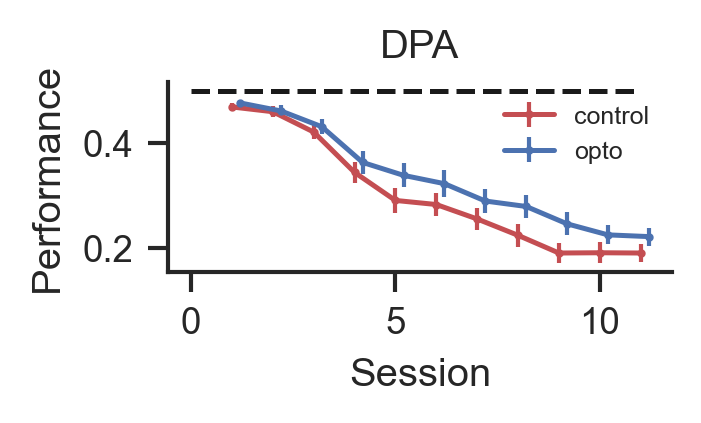

In [486]:
# cluster based permutation
plt.errorbar(sessions, mean_perf_control[0], yerr=sem_perf_control[0], color='r', fmt='-o', ms=1, elinewidth=1, label='control')
plt.errorbar(sessions+.2, mean_perf_opto[0], yerr=sem_perf_opto[0], color='b', fmt='-o', ms=1, elinewidth=1, label='opto')

# plt.plot(mean_perf_control[0], 'r', label='DPA')
# plt.plot(mean_perf_control[1], 'b', label='DualGo')
# plt.plot(mean_perf_control[2], 'g', label='DualNoGo')
plt.legend(loc='best', frameon=False, fontsize=6)
plt.title('DPA')
plt.xlabel("Session")
plt.ylabel("Performance")
# plt.ylim([.4, 1])
plt.hlines(.5, 0, mean_perf_control[0].shape[0], 'k', ls='--')


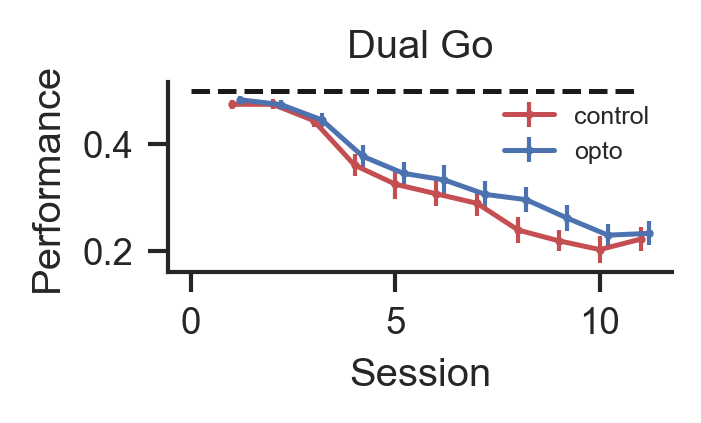

In [487]:
plt.errorbar(sessions, mean_perf_control[1], yerr=sem_perf_control[1], color='r', fmt='-o', ms=1, elinewidth=1, label='control')
plt.errorbar(sessions+.2, mean_perf_opto[1], yerr=sem_perf_opto[1], color='b', fmt='-o', ms=1, elinewidth=1, label='opto')

# plt.plot(mean_perf_control[0], 'r', label='DPA')
# plt.plot(mean_perf_control[1], 'b', label='DualGo')
# plt.plot(mean_perf_control[2], 'g', label='DualNoGo')
plt.legend(loc='best', frameon=False, fontsize=6)
plt.title('Dual Go')
plt.xlabel("Session")
plt.ylabel("Performance")
# plt.ylim([.4, 1])
plt.hlines(.5, 0, mean_perf_control[0].shape[0], 'k', ls='--')


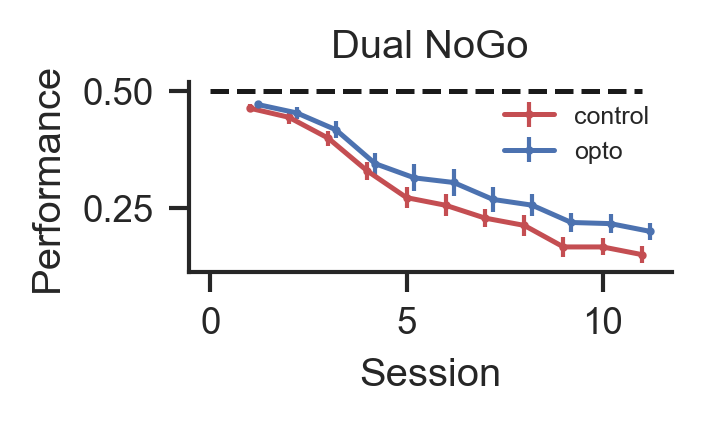

In [488]:
plt.errorbar(sessions, mean_perf_control[2], yerr=sem_perf_control[2], color='r', fmt='-o', ms=1, elinewidth=1, label='control')
plt.errorbar(sessions+.2, mean_perf_opto[2], yerr=sem_perf_opto[2], color='b', fmt='-o', ms=1, elinewidth=1, label='opto')

# plt.plot(mean_perf_control[0], 'r', label='DPA')
# plt.plot(mean_perf_control[1], 'b', label='DualGo')
# plt.plot(mean_perf_control[2], 'g', label='DualNoGo')
plt.legend(loc='best', frameon=False, fontsize=6)
plt.title('Dual NoGo')
plt.xlabel("Session")
plt.ylabel("Performance")
# plt.ylim([.4, 1])
plt.hlines(.5, 0, mean_perf_control[0].shape[0], 'k', ls='--')


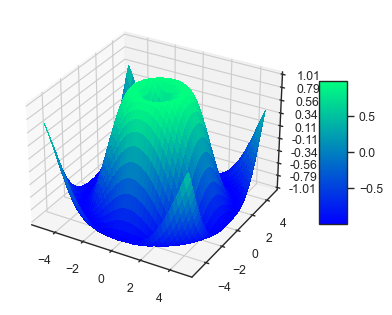

In [144]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = plt.axes(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='winter',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()